In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Data exploration and evaluation

In [3]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [7]:
df['Female'] = df['Sex'] == 'female'

test_df['Female'] = test_df['Sex'] == 'female'

### Values for Ages, Cabins and Embarked are missing 

In [8]:
def isnan(x):
    try:
        return np.isnan(x)
    except TypeError:
        return False

In [9]:
df.applymap(isnan).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Female           0
dtype: int64

In [10]:
test_df.applymap(isnan).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Female           0
dtype: int64

In [11]:
cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Female']

Column name|meaning
-|-
Fare|Ticket prize
SibSp|Number of Siblings/Spouses Aboard
Parch|Number of Parents/Children Aboard



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7227459cc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7224ec69e8>]], dtype=object)

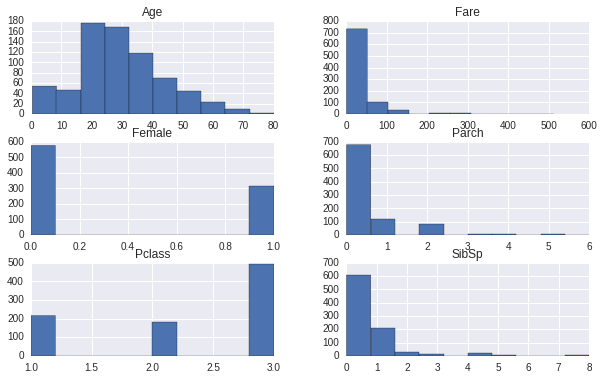

In [12]:
df[cols].hist(figsize=[10, 6])

In [13]:
df[cols].head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Female
0,3,22,1,0,7.2500,male,False
1,1,38,1,0,71.2833,female,True
2,3,26,0,0,7.9250,female,True
3,1,35,1,0,53.1000,female,True
4,3,35,0,0,8.0500,male,False


In [14]:
selected_features = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Female']

## Metrics

In [15]:
import sklearn.metrics as skm

/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [16]:
def metric(y_true, y_pred):
    conf_mat = skm.confusion_matrix(y_true, y_pred, labels=[1, 0])
    f1 = skm.f1_score(y_true, y_pred, labels=[1, 0])
    res = {'F1 score': f1, 'confusion matrix': conf_mat}
    for k, v in res.items():
        print(k+'\n')
        print(v)
        print()
    return res

In [17]:
metric(df['Survived'], df['Sex'] == 'female');

F1 score

0.710365853659

confusion matrix

[[233 109]
 [ 81 468]]



## Output format for submission

In [18]:
def to_result(y_pred, test_df, fname):
    """Takes y_pred pandas series with True/False values (Survived/Not-Survived)
    and writes with 1/0 to csv for kaggle submission.
    
    y_pred  - prediction of test set, pandas.Series with True/False
    test_df - test data, pandas.DataFrame
    fname   - file name of the output
    """
    assert len(y_pred) == len(test_df)
   
    y_pred_01 = pd.Series(y_pred).apply(lambda x: 1 if x else 0)
    assert (y_pred_01[y_pred] == 1).all()
    assert (y_pred_01[~y_pred] == 0).all()
    
    df = pd.DataFrame(
        {'PassengerId': test_df['PassengerId'], 'Survived': y_pred_01})
    df.to_csv(fname, delimiter=',', index=False)

# Gender model

In [19]:
sex_groups = df.groupby('Sex')

In [20]:
sex_groups.describe()

Age        Fare Female       Parch  PassengerId  \
Sex                                                                    
female count  261.000000  314.000000    314  314.000000   314.000000   
       mean    27.915709   44.479818      1    0.649682   431.028662   
       std     14.110146   57.997698      0    1.022846   256.846324   
       min      0.750000    6.750000   True    0.000000     2.000000   
       25%     18.000000   12.071875      1    0.000000   231.750000   
       50%     27.000000   23.000000      1    0.000000   414.500000   
       75%     37.000000   55.000000      1    1.000000   641.250000   
       max     63.000000  512.329200   True    6.000000   889.000000   
male   count  453.000000  577.000000    577  577.000000   577.000000   
       mean    30.726645   25.523893      0    0.235702   454.147314   
       std     14.678201   43.138263      0    0.612294   257.486139   
       min      0.420000    0.000000  False    0.000000     1.000000   
       25%     21.000000    7.895800      0    0.000000   222.000000   
       50%     29.000000   10.500000      0    0.000000   464.000000   
       75%     39.000000   26.550000      0    0.000000   680.000000   
       max     80.000000  512.329200  False    5.000000   891.000000   

                  Pclass       SibSp    Survived  
Sex                                               
female count  314.000000  314.000000  314.000000  
       mean     2.159236    0.694268    0.742038  
       std      0.857290    1.156520    0.438211  
       min      1.000000    0.000000    0.000000  
       25%      1.000000    0.000000    0.000000  
       50%      2.000000    0.000000    1.000000  
       75%      3.000000    1.000000    1.000000  
       max      3.000000    8.000000    1.000000  
male   count  577.000000  577.000000  577.000000  
       mean     2.389948    0.429809    0.188908  
       std      0.813580    1.061811    0.391775  
       min      1.000000    0.000000    0.000000  
       25%      2.000000    0.000000    0.000000  
       50%      3.000000    0.000000    0.000000  
       75%      3.000000    0.000000    0.000000  
       max      3.000000    8.000000    1.000000

In [21]:
females_survives = (test_df['Sex'] == 'female')
females_survives[:10]

0    False
1     True
2    False
3    False
4     True
5    False
6     True
7    False
8     True
9    False
Name: Sex, dtype: bool

In [22]:
gendermodel_df = pd.read_csv('gendermodel.csv')

In [26]:
(pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': females_survives}) - gendermodel_df).describe()

,PassengerId,Survived
count,418,418
mean,0,0
std,0,0
min,0,0
25%,0,0
50%,0,0
75%,0,0
max,0,0


In [27]:
to_result(females_survives, test_df, 'females_survives.csv')

# Prepare dataset for machine learning

In [28]:
import sklearn.cross_validation as skcv

In [247]:
selected_features = selected_features + ['Age']

In [267]:
def fillna_with_median(series):
    med = series.median()
    return series.fillna(med)

In [268]:
df['Age'] = fillna_with_median(df['Age'])

In [269]:
df[selected_features].head()

,Pclass,SibSp,Parch,Fare,Female,Age
0,3,1,0,7.2500,False,22
1,1,1,0,71.2833,True,38
2,3,0,0,7.9250,True,26
3,1,1,0,53.1000,True,35
4,3,0,0,8.0500,False,35


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7213684a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f721350b8d0>]], dtype=object)

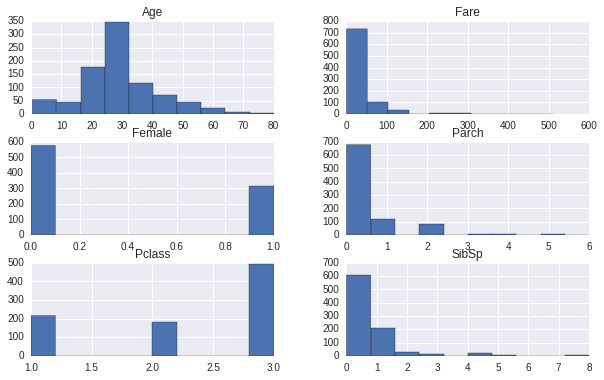

In [270]:
df[selected_features].hist(figsize=(10, 6))

In [271]:
X_train, X_cv, y_train, y_cv = skcv.train_test_split(df[selected_features], df['Survived'])

In [272]:
len(X_train)

668

In [273]:
test_df[selected_features].applymap(isnan).sum()

Pclass     0
SibSp      0
Parch      0
Fare       1
Female     0
Age       86
dtype: int64

Fillna one Nan value of Fare with 0. Maybe not a good idea. Better mark the filled value with an additional feature. Not so critical since it is in the test set.

In [274]:
X_test = test_df[selected_features]
X_test['Fare'] = fillna_with_median(X_test['Fare'])
X_test['Age'] = fillna_with_median(X_test['Age'])

/home/tzech/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/tzech/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [276]:
X_test[selected_features].applymap(isnan).sum()

Pclass    0
SibSp     0
Parch     0
Fare      0
Female    0
Age       0
dtype: int64

# Logistic regression

In [277]:
import sklearn.linear_model as skl

In [278]:
logR = skl.LinearRegression()

In [279]:
logR.fit(X_train, y_train)

/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [290]:
logR.fit(df[selected_features], df['Survived'])

/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [291]:
y_pred = logR.predict(X_cv)

In [292]:
metric(y_cv, y_pred > 0.5)

F1 score

0.781609195402

confusion matrix

[[ 68  20]
 [ 18 117]]



{'F1 score': 0.78160919540229878, 'confusion matrix': array([[ 68,  20],
        [ 18, 117]])}

In [293]:
logR.coef_, logR.intercept_

(array([ -1.70002800e-01,  -4.33722337e-02,  -1.99226662e-02,
          4.13454158e-04,   5.12348642e-01,  -5.87131734e-03]),
 0.78710001510951011)

In [294]:
scores = skcv.cross_val_score(logR, df[selected_features], df['Survived'], cv=5)

/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.s

In [295]:
scores

array([ 0.33780058,  0.37213459,  0.37999816,  0.31295817,  0.44748029])

In [296]:
scores.mean()

0.37007435828905344

In [297]:
import sklearn.learning_curve as sklc

In [298]:
train_sizes, train_scores, valid_scores = sklc.learning_curve(
    logR, df[selected_features], df['Survived'], cv=5, train_sizes=range(10, 500, 10));

/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.s

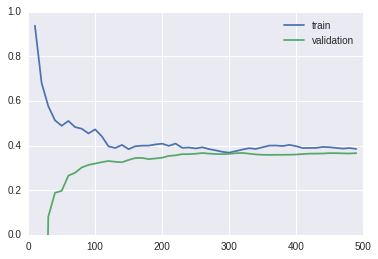

In [299]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='validation')
plt.legend()
plt.ylim([0, 1]);

In [300]:
y_test = logR.predict(X_test)
to_result(y_test > 0.5, test_df, 'logistic_regression02.csv')

# Preprocessing

In [42]:
import sklearn.preprocessing as skpp

In [52]:
scaler = skpp.StandardScaler()

In [48]:
import sklearn.pipeline as skpi

# Logistic regression with polynomial features

In [301]:
polynomial = skpp.PolynomialFeatures(degree=2)

In [308]:
pipeLogRPoly = skpi.Pipeline([('Polynomial', polynomial), ('LogisticRegression', logR)])

In [303]:
pipeLogRPoly.fit(X_train, y_train)

/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


Pipeline(steps=[('Polynomial', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('LogisticRegression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [309]:
pipeLogRPoly.fit(df[selected_features], df['Survived'])

/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


Pipeline(steps=[('Polynomial', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('LogisticRegression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [310]:
y_pred = pipeLogRPoly.predict(X_cv)
metric(y_cv, y_pred > 0.5)

F1 score

0.823529411765

confusion matrix

[[ 70  18]
 [ 12 123]]



{'F1 score': 0.82352941176470584, 'confusion matrix': array([[ 70,  18],
        [ 12, 123]])}

In [305]:
train_sizes, train_scores, valid_scores = sklc.learning_curve(
    pipeLogRPoly, df[selected_features], df['Survived'], cv=5, train_sizes=range(10, 500, 10));

/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.s

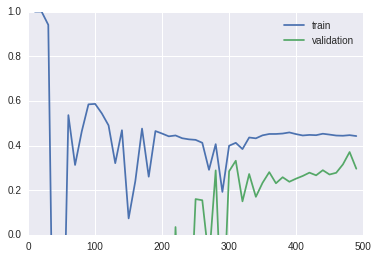

In [306]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='validation')
plt.legend()
plt.ylim([0, 1]);

In [311]:
y_test = pipeLogRPoly.predict(X_test)
to_result(y_test > 0.5, test_df, 'logistic_regression_poly_deg2_Age.csv')

# Random Tree

In [64]:
import sklearn.tree as sktr

In [120]:
tree = sktr.DecisionTreeClassifier()

In [121]:
pipeTree = skpi.Pipeline([('DecisionTree', tree)])

In [138]:
pipeTree.fit(X_train, y_train)

/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


Pipeline(steps=[('DecisionTree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best'))])

In [139]:
y_pred = pipeTree.predict(X_cv)
metric(y_cv, y_pred)

F1 score

0.670967741935

confusion matrix

[[ 52  25]
 [ 26 120]]



{'F1 score': 0.67096774193548381, 'confusion matrix': array([[ 52,  25],
        [ 26, 120]])}

In [141]:
selected_features

['Pclass', 'SibSp', 'Parch', 'Fare', 'Female']

In [140]:
with open('randomTreeVis.dot', 'w') as f:
    sktr.export_graphviz(tree, f)

In [88]:
pipeTreeStdSca = skpi.Pipeline([('StandardScaler', scaler), ('DecisionTree', tree)])

In [89]:
pipeTreeStdSca.fit(X_train, y_train)

/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


Pipeline(steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('DecisionTree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best'))])

In [90]:
y_pred = pipeTreeStdSca.predict(X_cv)
metric(y_cv, y_pred)

F1 score

0.666666666667

confusion matrix

[[ 52  25]
 [ 27 119]]



{'F1 score': 0.66666666666666663, 'confusion matrix': array([[ 52,  25],
        [ 27, 119]])}

# Random Forest

In [91]:
import sklearn.ensemble as sken

In [92]:
forest = sken.RandomForestClassifier()

In [110]:
forest.fit(X_train, y_train);

/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/home/tzech/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.s

In [111]:
y_pred = forest.predict(X_cv)
metric(y_cv, y_pred)

F1 score

0.697368421053

confusion matrix

[[ 53  24]
 [ 22 124]]



{'F1 score': 0.69736842105263153, 'confusion matrix': array([[ 53,  24],
        [ 22, 124]])}

In [112]:
y_test = forest.predict(X_test)
to_result(y_test > 0.5, test_df, 'random_forest.csv')